In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
# from statsmodels.tsa.ar_model import AutoReg, ar_select_order
# from statsmodels.tsa.api import acf, pacf, graphics

In [2]:
import pandas as pd

# 1 ETS Model 
 E : Error
 
 T : Trend 
 
 S : Seasonality

In [3]:

data=pd.read_csv('/Users/anoop.sharma/Downloads/FUTIDX_BANKNIFTY_26-03-2020_TO_24-04-2020.csv',index_col=1)

In [4]:
data.index=pd.to_datetime(data.index)


In [5]:
# To Get EWMA 
ewma_data=data
ewma_data['EWMA-12']=ewma_data['Close'].ewm(span=12).mean()

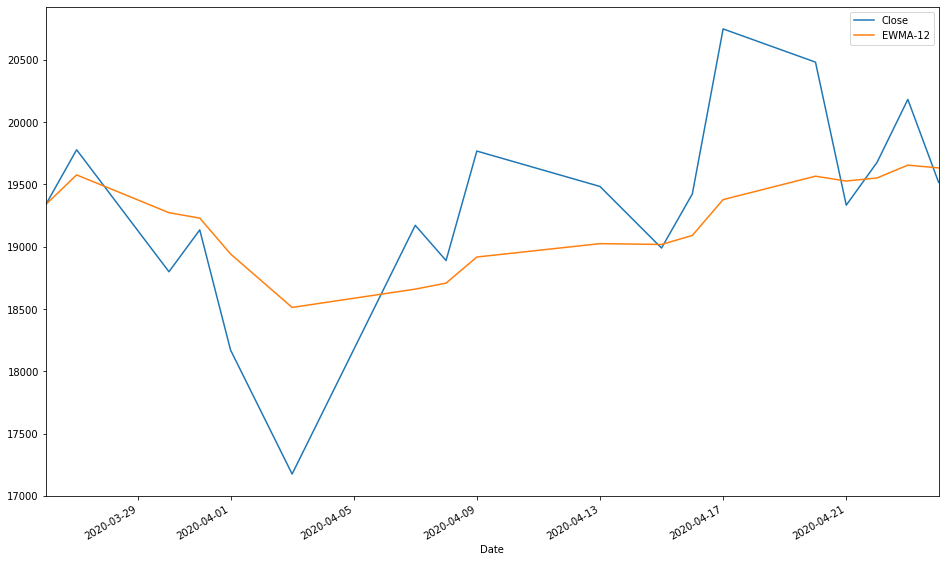

In [6]:
ewma_data[['Close','EWMA-12']].plot(figsize=(16,10))

In [7]:
#  ETS Model 

from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
data['Close'].index

DatetimeIndex(['2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-03', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-13', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
result=seasonal_decompose(data['Close'],period=1)

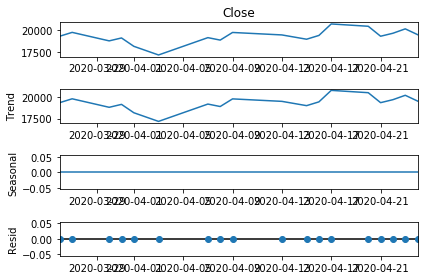

In [10]:

fig=result.plot();
fig.tight_layout()


# Auto Regression Model

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [12]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [13]:
data = pd.read_csv('/Users/anoop.sharma/Downloads/data (1).csv',index_col=1)
data=data['Close']
data.index=pd.date_range('2019-05-26',periods=len(data),freq='B',)
data.asfreq('D')
data.index
data

2019-05-27    31653.65
2019-05-28    31589.05
2019-05-29    30857.40
2019-05-30    31066.55
2019-05-31    31034.00
                ...   
2020-03-27    19586.65
2020-03-30    20081.15
2020-03-31    20671.10
2020-04-01    21090.20
2020-04-02    21534.50
Freq: B, Name: Close, Length: 224, dtype: float64

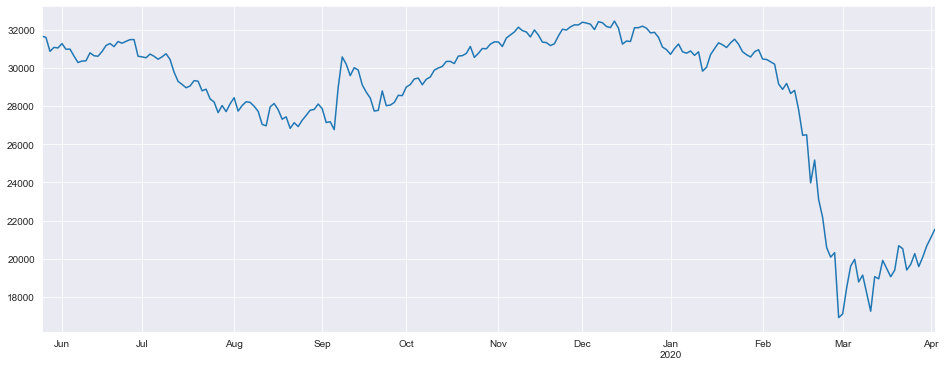

In [14]:

# data = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages

fig, ax = plt.subplots()
ax = data.plot(ax=ax)

In [15]:
data.index

DatetimeIndex(['2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30',
               '2019-05-31', '2019-06-03', '2019-06-04', '2019-06-05',
               '2019-06-06', '2019-06-07',
               ...
               '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02'],
              dtype='datetime64[ns]', length=224, freq='B')

In [16]:
data.dropna(inplace=True)
mod = AutoReg(data, 10)
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                  224
Model:                    AutoReg(10)   Log Likelihood               -1658.902
Method:               Conditional MLE   S.D. of innovations            562.809
Date:                Sun, 17 May 2020   AIC                             12.778
Time:                        18:34:21   BIC                             12.967
Sample:                    06-10-2019   HQIC                            12.854
                         - 04-02-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    423.1649    322.514      1.312      0.189    -208.951    1055.281
Close.L1       1.0251      0.068     14.974      0.000       0.891       1.159
Close.L2      -0.0493      0.098     -0.503      0.615      -0.241       0.143
Close.L3       0.0416      0.097      0.429      0.668      -0.149       0.232
Close.L4      -0.0039      0.095     -0.041      0.967      -0.190       0.182
Close.L5       0.1620      0.093      1.737      0.082      -0.021       0.345
Close.L6      -0.2818      0.094     -3.009      0.003      -0.465      -0.098
Close.L7       0.3038      0.096      3.177      0.001       0.116       0.491
Close.L8      -0.1914      0.098     -1.946      0.052      -0.384       0.001
Close.L9       0.0093      0.099      0.093      0.926      -0.185       0.204
Close.L10     -0.0309      0.070     -0.439      0.660      -0.169       0.107
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0129           -0.5604j            1.1576           -0.4196
AR.2            -1.0129           +0.5604j            1.1576            0.4196
AR.3             1.0367           -0.0000j            1.0367           -0.0000
AR.4             1.1095           -0.0000j            1.1095           -0.0000
AR.5             0.8425           -1.0143j            1.3186           -0.1397
AR.6             0.8425           +1.0143j            1.3186            0.1397
AR.7            -0.0926           -1.3287j            1.3320           -0.2611
AR.8            -0.0926           +1.3287j            1.3320            0.2611
AR.9            -0.6601           -2.5252j            2.6101           -0.2907
AR.10           -0.6601           +2.5252j            2.6101            0.2907
------------------------------------------------------------------------------
"""

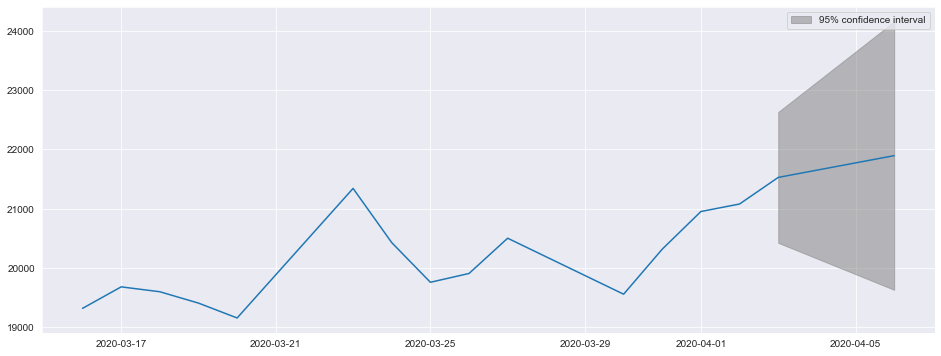

In [17]:
fig = res.plot_predict(210
                       , 225)


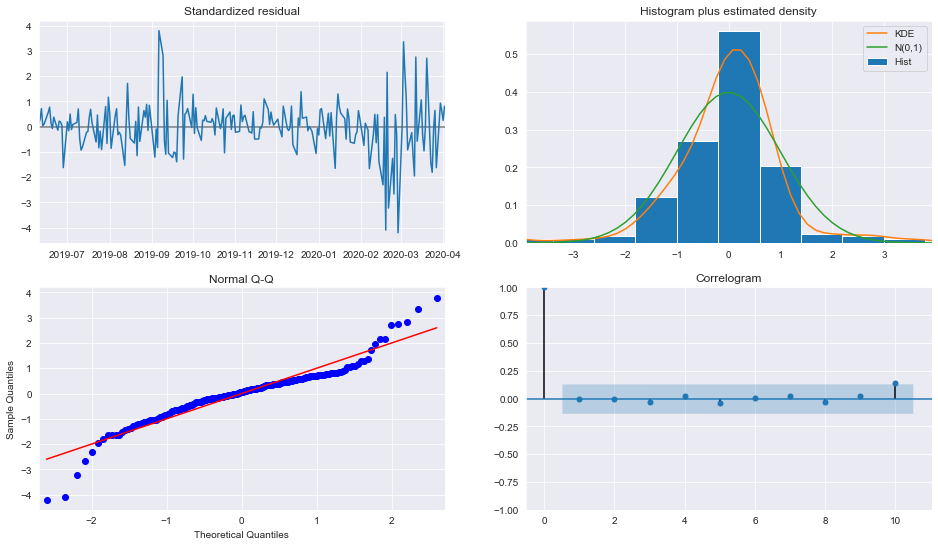

In [18]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=10)


In [19]:
res.

SyntaxError: invalid syntax (<ipython-input-19-8ccdd3977c84>, line 1)

# ARIMA model

In [20]:
data=pd.read_csv('/Users/anoop.sharma/Downloads/data (1).csv',index_col=0)
data.index=pd.DatetimeIndex(data.index)

In [21]:
# To check data is stationery or not use Augemneted Dicky Fuller Test

from statsmodels.tsa.stattools import adfuller

In [22]:
res=adfuller(data['Close'])

In [23]:
res

(-1.8291774831329857,
 0.3660750913878351,
 10,
 213,
 {'1%': -3.461429147102264,
  '5%': -2.875206950587861,
  '10%': -2.5740544497344002},
 3247.3907884557348)

In [24]:
def check_adf(df):
    res=adfuller(df)
    print('Augumented Dicky Fuller Test')
    labels=['ADF Test Stats','p-value','# of lags used','No. of Observations used']
    for value,label in zip(res,labels):
        print(label + ' : '+str(value))
    if(res[1]<0.05):
        print('Strong evidence againt null hypothesis')
        print('Data is stationery')
    else:
        print('Data is non stationery')

In [25]:
check_adf(data['Close'])

Augumented Dicky Fuller Test
ADF Test Stats : -1.8291774831329857
p-value : 0.3660750913878351
# of lags used : 10
No. of Observations used : 213
Data is non stationery


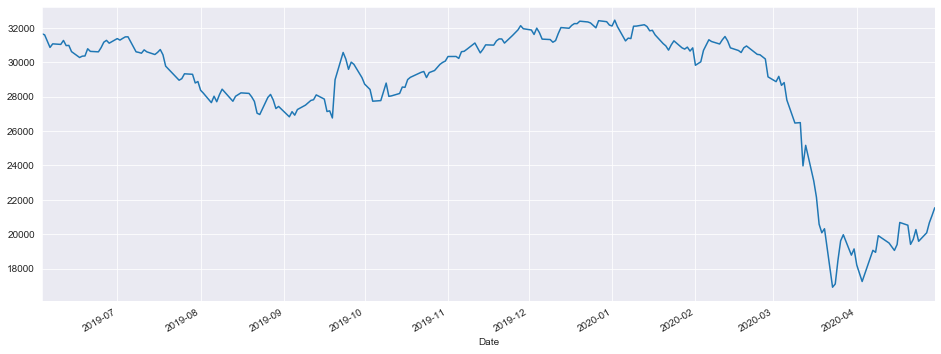

In [26]:
data['Close'].plot()

In [27]:
# First difffernce

data['First Difference']=data['Close']-data['Close'].shift(1)

In [28]:
data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),First Difference
Date,,,,,,,
2019-06-03,31406.05,31674.60,31284.70,31653.65,160090476,4443.90,NaN
2019-06-04,31532.90,31752.70,31512.95,31589.05,172424592,4627.37,-64.60
2019-06-06,31523.95,31541.50,30800.80,30857.40,283140588,7895.98,-731.65
2019-06-07,30943.15,31139.60,30627.05,31066.55,215267224,5593.78,209.15
2019-06-10,31259.20,31367.40,30861.30,31034.00,208614002,4870.64,-32.55
...,...,...,...,...,...,...,...
2020-04-24,19697.65,19950.15,19515.40,19586.65,305735017,8019.89,-681.30
2020-04-27,19870.80,20224.75,19847.65,20081.15,299864446,8082.32,494.50
2020-04-28,20436.60,20751.30,20260.80,20671.10,367772101,10339.15,589.95


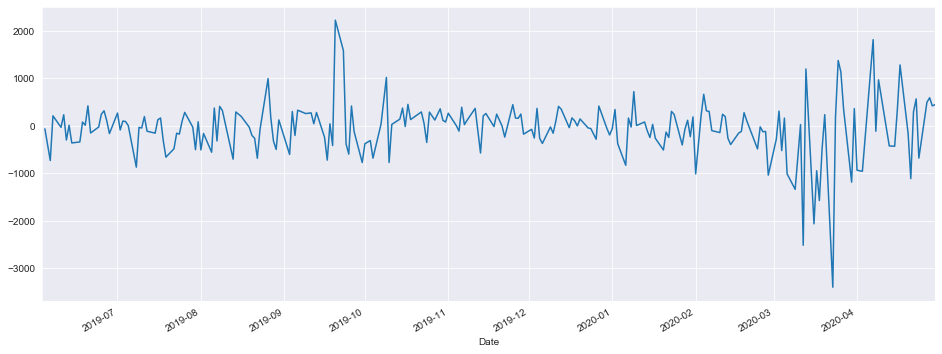

In [29]:
data['First Difference'].plot()

In [30]:
check_adf(data['First Difference'].dropna())

Augumented Dicky Fuller Test
ADF Test Stats : -4.027500755237777
p-value : 0.001273161145505758
# of lags used : 6
No. of Observations used : 216
Strong evidence againt null hypothesis
Data is stationery


In [31]:
# Auto correlation and partial auto correlation

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

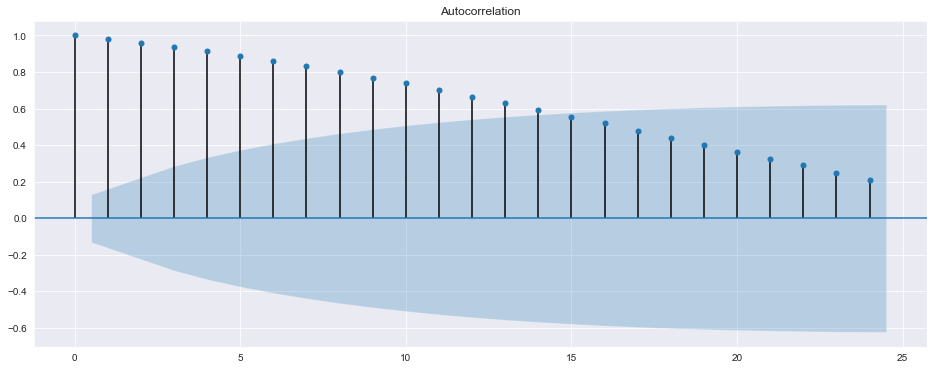

In [32]:
plot_acf(data['Close']);

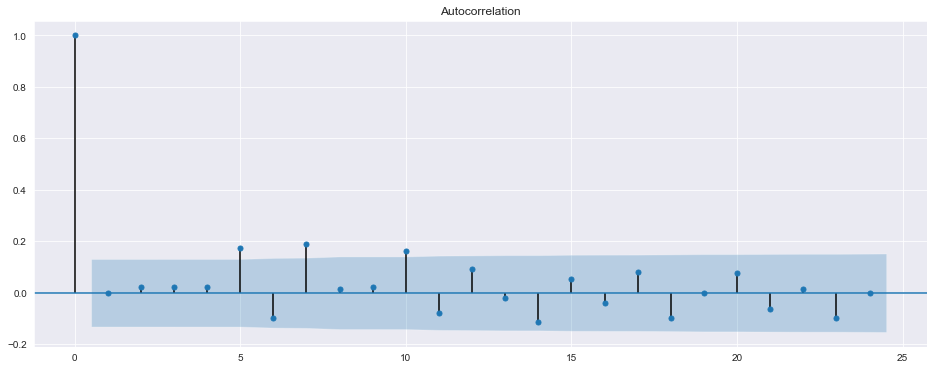

In [33]:
plot_acf(data['First Difference'].dropna());

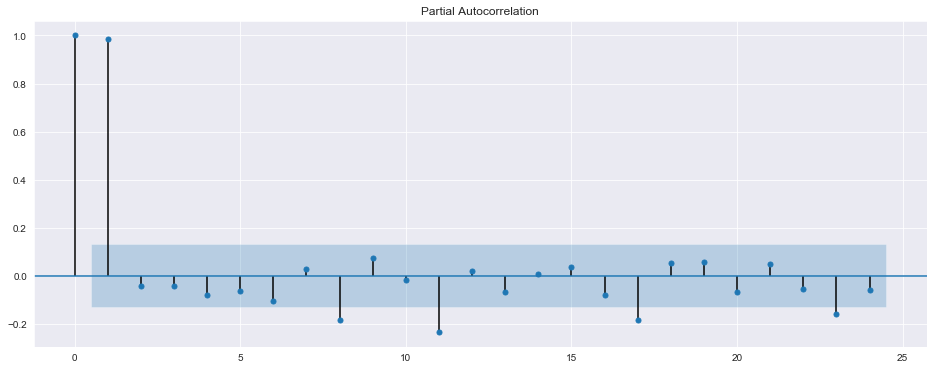

In [34]:
plot_pacf(data['Close']);

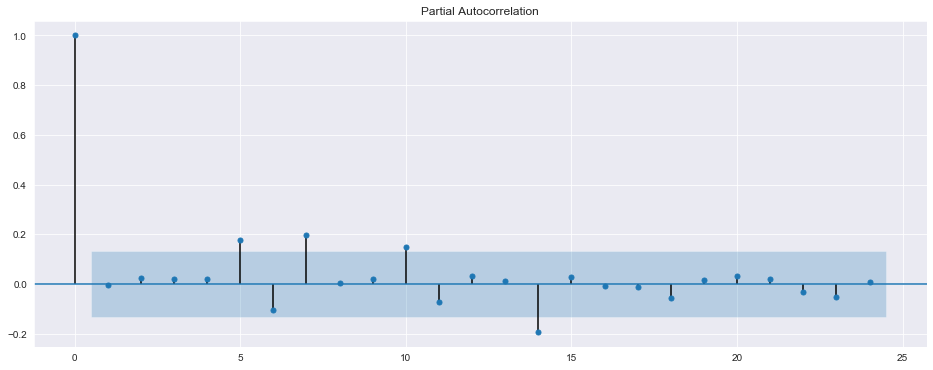

In [35]:
plot_pacf(data['First Difference'].dropna());

In [36]:
# stats model way for acf pacf
from statsmodels.tsa.stattools import acf,pacf

/Users/anoop.sharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


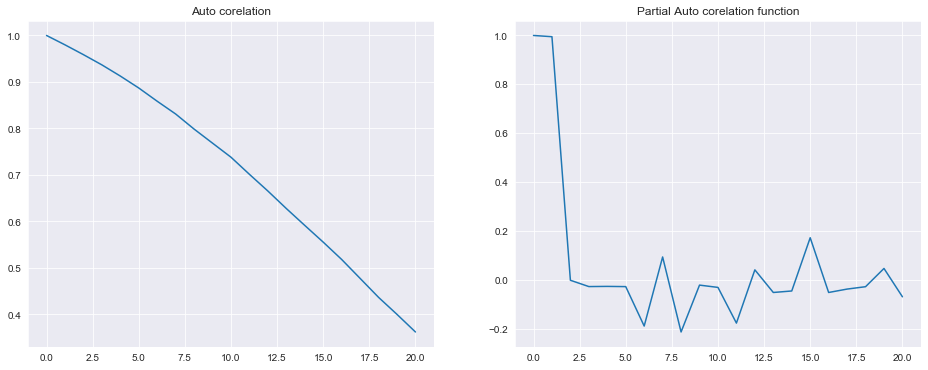

In [37]:
plt.subplot(121)
plt.plot(acf(data['Close'],nlags=20))
plt.title('Auto corelation')

plt.subplot(122)
plt.plot(pacf(data['Close'],nlags=20,method="ols"))
plt.title('Partial Auto corelation function')


plt.show();
plt.tight_layout;
